# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 3.8: Compressão JPEG

In [1]:
import numpy as np
import scipy.fftpack as spfft
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML
from urllib.request import urlopen

### Seção 3.8.1: Visão geral da compressão JPEG

Vamos considerar como entrada uma imagem RGB $M\times N$ com 24 bits por pixel, sendo 8 bits para cada canal, em valores inteiros com sinal (ou seja, na faixa $-127,\ldots,+128$). Se os valores originais forem sem sinal (na faixa $0,\ldots,255$) basta subtrair $127$ de cada pixel.

Passos do método JPEG:
1. Separação em cores (RGB $\rightarrow R\in M_{M\times N}(\mathbb{R}), G\in M_{M\times N}(\mathbb{R}), B\in M_{M\times N}(\mathbb{R})$ )

2. Blocagem (8x8) e DCT em blocos.

3. Quantização: esse passo usa uma matriz $E \in M_{8\times 8}$ onde $e_{k,l}$ determina a quantização de cada coeficiente DCT de frequências $(k,l)$ através da fórmula:

	$$q(x) = round\left(\frac{x}{e_{k,l}}\right).$$
    
4. Codificação

A reconstrução é dada pelos passos

4. Decodificação

3. Dequantização:

$$\tilde{x} = e_{k,l}q(x)$$
    
2. DCT inversa nos blocos e remontagem da matriz

1. Combinação das cores

### Seção 3.8.2: Detalhes da quantização na DCT em JPEG

Um exemplo de matriz usada na expressão $q(x) = round\left(\frac{x}{e_{k,l}}\right)$:

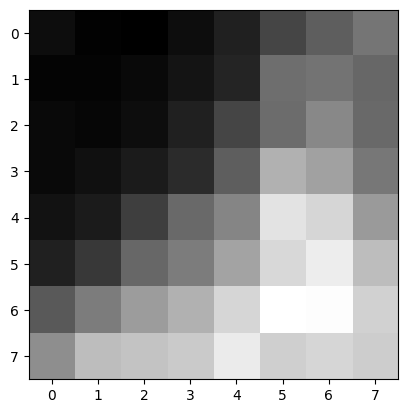

In [2]:
E = np.array([ [ 16,  11,  10,  16,  24,  40,  51,  61 ],
               [ 12,  12,  14,  19,  26,  58,  60,  55 ],
               [ 14,  13,  16,  24,  40,  57,  69,  56 ],
               [ 14,  17,  22,  29,  51,  87,  80,  62 ],
               [ 18,  22,  37,  56,  68, 109, 103,  77 ],
               [ 24,  35,  55,  64,  81, 104, 113,  92 ],
               [ 49,  64,  78,  87, 103, 121, 120, 101 ],
               [ 72,  92,  95,  98, 112, 100, 103,  99 ] ] )
plt.imshow(E, cmap='gray');plt.show()

### Exemplo 3.1: exemplo de bloco (parte de uma imagem):

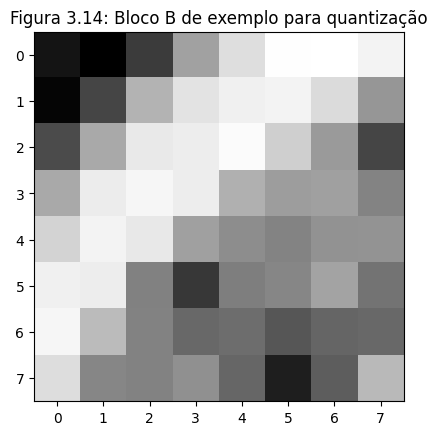

In [3]:
B = np.array( 
    [ [ 47,  32,  75, 148, 192, 215, 216, 207 ],
      [ 36,  82, 161, 196, 205, 207, 190, 140 ],
      [ 86, 154, 200, 203, 213, 181, 143, 82 ],
      [ 154, 202, 209, 203, 159, 145, 147, 127 ],
      [ 184, 207, 199, 147, 134, 127, 137, 138 ],
      [ 205, 203, 125,  72, 123, 129, 150, 115 ],
      [ 209, 167, 126, 107, 111,  94, 105, 107 ],
      [ 191, 129, 126, 136, 106,  54,  99, 165 ] ] )
plt.imshow(B, cmap='gray')
plt.title("Figura 3.14: Bloco B de exemplo para quantização");plt.show()

### Cálculo de $\hat{B}=\mbox{DCT}(B)$ (usando $B-127$)

In [4]:
# calcula a DCT 2D fazendo a DCT 1D das linhas e das colunas
def dct_2d(m):
    D1 = spfft.dct(m.T, norm='ortho')
    D2 = spfft.dct(D1.T, norm='ortho')
    return D2

[[ 157.    9.  -43.   -4.  -11.    3.  -16.   18.]
 [  66. -216. -191.    5.  -39.   14.    7.  -10.]
 [ -88. -148.   11.   23.   72.   22.   13.    1.]
 [ -20.  -55.   90.   61.  -16.  -13.   -2.    4.]
 [  16.  -23.   42.  -44.   41.   13.    8.  -11.]
 [  -5.   16.   11.   23.    6.   -0.   -6.   -9.]
 [ -10.   -9.   12.   25.   -2.  -15.   -9.    8.]
 [  -6.   17.  -18.   -2.    4.   -5.   10.    5.]]


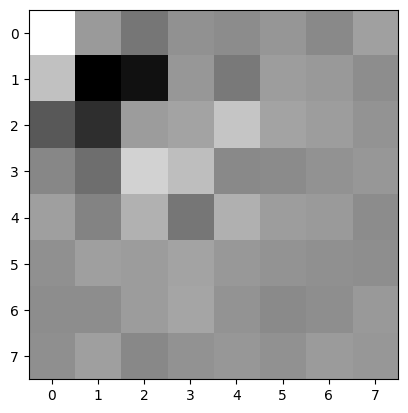

In [5]:
Bhat = dct_2d(B-127)
print(np.round(Bhat,0))
plt.imshow(Bhat, cmap='gray');plt.show()

### Bloco com coeficientes DCT quantizados $q(\hat{B})$

[[ 10.   1.  -4.  -0.  -0.   0.  -0.   0.]
 [  6. -18. -14.   0.  -1.   0.   0.  -0.]
 [ -6. -11.   1.   1.   2.   0.   0.   0.]
 [ -1.  -3.   4.   2.  -0.  -0.  -0.   0.]
 [  1.  -1.   1.  -1.   1.   0.   0.  -0.]
 [ -0.   0.   0.   0.   0.  -0.  -0.  -0.]
 [ -0.  -0.   0.   0.  -0.  -0.  -0.   0.]
 [ -0.   0.  -0.  -0.   0.  -0.   0.   0.]]


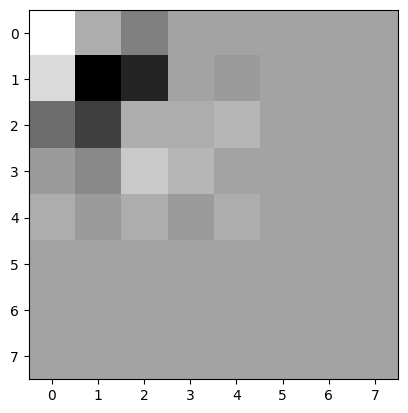

In [6]:
Bquant = np.round(Bhat/(E))
print(Bquant)
plt.imshow(Bquant, cmap='gray');plt.show()

### DCT $\tilde{B}$ reconstruída a partir dos coeficientes quantizados

[[ 160.   11.  -40.   -0.   -0.    0.   -0.    0.]
 [  72. -216. -196.    0.  -26.    0.    0.   -0.]
 [ -84. -143.   16.   24.   80.    0.    0.    0.]
 [ -14.  -51.   88.   58.   -0.   -0.   -0.    0.]
 [  18.  -22.   37.  -56.   68.    0.    0.   -0.]
 [  -0.    0.    0.    0.    0.   -0.   -0.   -0.]
 [  -0.   -0.    0.    0.   -0.   -0.   -0.    0.]
 [  -0.    0.   -0.   -0.    0.   -0.    0.    0.]]


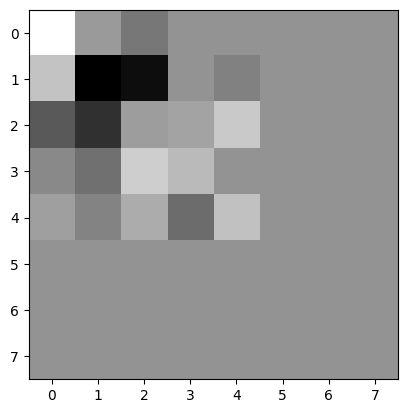

In [7]:
Btil = Bquant*(E);
print(Btil)
plt.imshow(Btil, cmap='gray');plt.show()

In [8]:
# calcula a IDCT 2D fazendo a IDCT 1D das linhas e das colunas
def idct_2d(m):
    D1 = spfft.idct(m.T, norm='ortho')
    D2 = spfft.idct(D1.T, norm='ortho')
    return D2

### Bloco JPEG reconstruído a partir da DCT quantizada

[[ 48.  35.  77. 164. 211. 201. 202. 229.]
 [ 49.  92. 142. 181. 211. 216. 179. 132.]
 [ 81. 155. 208. 207. 198. 193. 149.  88.]
 [145. 190. 221. 204. 167. 144. 135. 130.]
 [199. 200. 182. 150. 128. 130. 139. 144.]
 [215. 192. 139.  94. 103. 140. 139. 106.]
 [206. 166. 119.  97. 100. 110. 114. 113.]
 [196. 139. 118. 135. 106.  54.  85. 167.]]


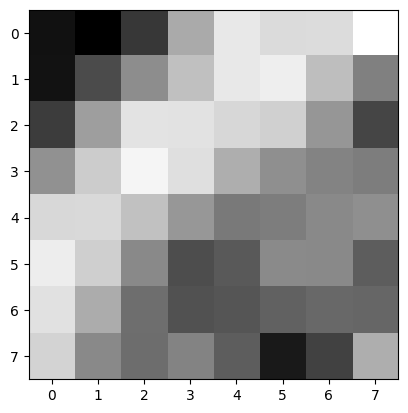

In [9]:
Bn = np.round(idct_2d(Btil)+127)
print(Bn)
plt.imshow(Bn, cmap='gray');plt.show()

### Compara bloco $B$ original e o bloco reconstruído $\mbox{IDCT}(\tilde{B})$

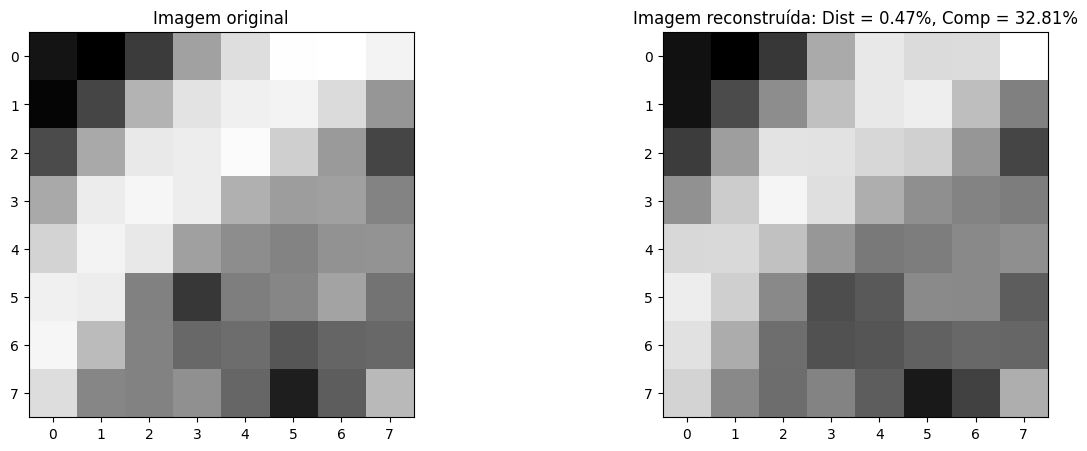

In [10]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].set_title("Imagem original")
ax[0].imshow(B, cmap='gray')
ax[1].set_title("Imagem reconstruída: Dist = {0:.2f}%, Comp = {1:.2f}%".format
                (100*np.linalg.norm(B-Bn)**2/np.linalg.norm(B)**2,100*np.sum(np.sum(Bquant!=0))/64))
ax[1].imshow(Bn, cmap='gray');plt.show()

### Flexibilizando a quantização

É possível aumentar a flexibilidade do esquema de quantização usando um parâmetro adicional $r>0$ junto com a matriz de quantização $E$, adaptando a fórmula da quantização e dequantização para
$$q(x) = round\left(\frac{x}{r\cdot e_{k,l}}\right)$$
e
$$\tilde{x} = r\cdot e_{k,l}q(x).$$

A interpretação dessa flexibilização é:
- para $r>1$ teremos uma quantização mais "grosseira", reduzindo o número de bits necessários para armazenar cada valor (e piorando a qualidade da imagem reconstruída);
- para $r\in(0,1)$ teremos uma quantização mais "fina", preservando mais detalhes da imagem reconstruída (às custas de uma compressão menos econômica).

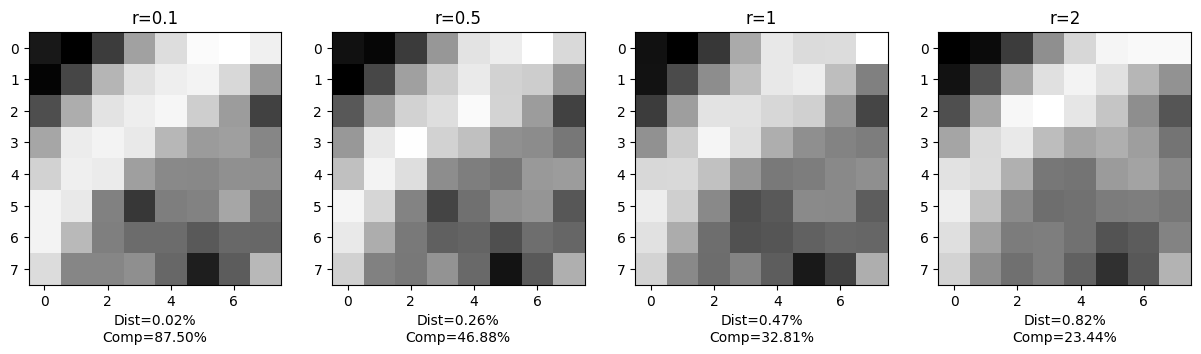

In [11]:
# Repete o exemplo anterior com r=0.1, 0.5, 1 e 2
R = [ 0.1, 0.5, 1, 2 ]
fig, ax = plt.subplots(1,len(R),figsize=(15,5))
for k in range(len(R)):
    Bquant = np.round(Bhat/(R[k]*E)) # Calcula valores quantizados
    Btil = Bquant*(R[k]*E) # Retorna à escala original (este é o passo da de(s)quantização)
    Bn = np.round(idct_2d(Btil)+127) # Aplica a DCT, voltando os valores à faixa 0...255
    ax[k].set_title(f"r={R[k]}")
    ax[k].set_xlabel(f"Dist={100*np.linalg.norm(B-Bn)**2/np.linalg.norm(B)**2:.2f}%\nComp={100*np.sum(np.sum(Bquant!=0))/64:.2f}%")
    ax[k].imshow(Bn/np.amax(Bn), cmap='gray', interpolation='None')
plt.show()

### Funções auxiliares: DCT e IDCT em blocos m x n

In [12]:
# Adaptado de https://www.rose-hulman.edu/mathDFT/matlabbookroutines/blkdct2.m
# Uso: Y = blkdct2(y, m, n) e y = blkidct2(Y, m, n).
# DCT e IDCT em blocos sobre a matriz y usando blocos de m x n. As dimensões
# das matrizes devem ser divisíveis por m e n respectivamente.

def blkdct2(y, m, n):
    my,ny = y.shape
    Y = 0*y
    for j in range(0, my, m):
        for k in range(0, ny, n):
            Z = y[j : j+m, k : k+n]
            Y[j : j+m, k : k+n] = dct_2d(Z)
    return Y

def blkidct2(y, m, n):
    my,ny = y.shape
    Y = 0*y
    for j in range(0, my, m):
        for k in range(0, ny, n):
            Z = y[j : j+m, k : k+n]
            Y[j : j+m, k : k+n] = idct_2d(Z)
    return Y

### Seção 3.8.3: JPEG aplicado à roda gigante

In [13]:
# função auxiliar: converte imagem colorida para cinza
def rgb2gray(rgb):
    fil = [0.299, 0.587, 0.144]
    return np.dot(rgb, fil)
# Carrega a imagem da internet e converte para nível de cinza
url = "http://sutherncharm.files.wordpress.com/2009/09/double-ferris.jpg"
M = rgb2gray(imread(urlopen(url).read()))
My, Mx = M.shape
divsize = 8
new_My = My - My % divsize
new_Mx = Mx - Mx % divsize
M=M[:new_My, :new_Mx]
My,Mx = M.shape
# Calcula a DCT em blocos de 8x8, e mostra o resultado
N=blkdct2(M,8,8)
Nlog = np.log(1 + abs(N))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  import sys


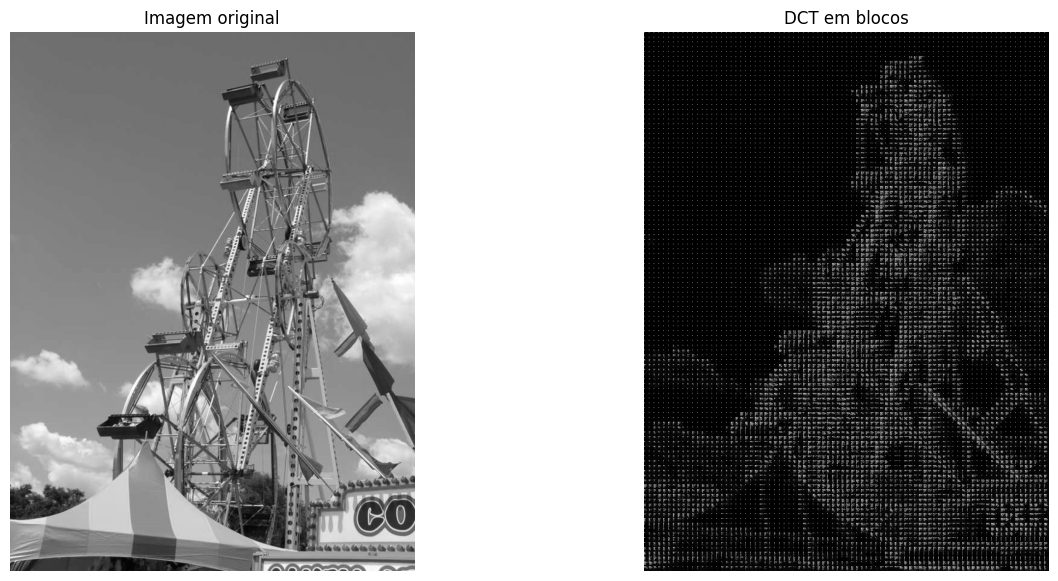

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].imshow(M, cmap='gray');ax[0].axis('off');ax[0].set_title("Imagem original")
ax[1].imshow(Nlog / np.amax(Nlog), cmap='gray');ax[1].axis('off');ax[1].set_title("DCT em blocos");plt.show()

In [15]:
Nquant = N.copy()
Ntil = N.copy()
# Parâmetro de granularidade da quantização
# (faz pouca diferença nesse exemplo; experimente R=0.1)
R=1
# Processa todos os blocos
for j in range(0, My, divsize):
    for k in range(0, Mx, divsize):
        Nquant[j:j+divsize,k:k+divsize] = np.round(N[j:j+divsize,k:k+divsize]/(R*E))
        Ntil[j:j+divsize,k:k+divsize] = (R*E)*Nquant[j:j+divsize,k:k+divsize]
Mn = np.round(blkidct2(Ntil,8,8))

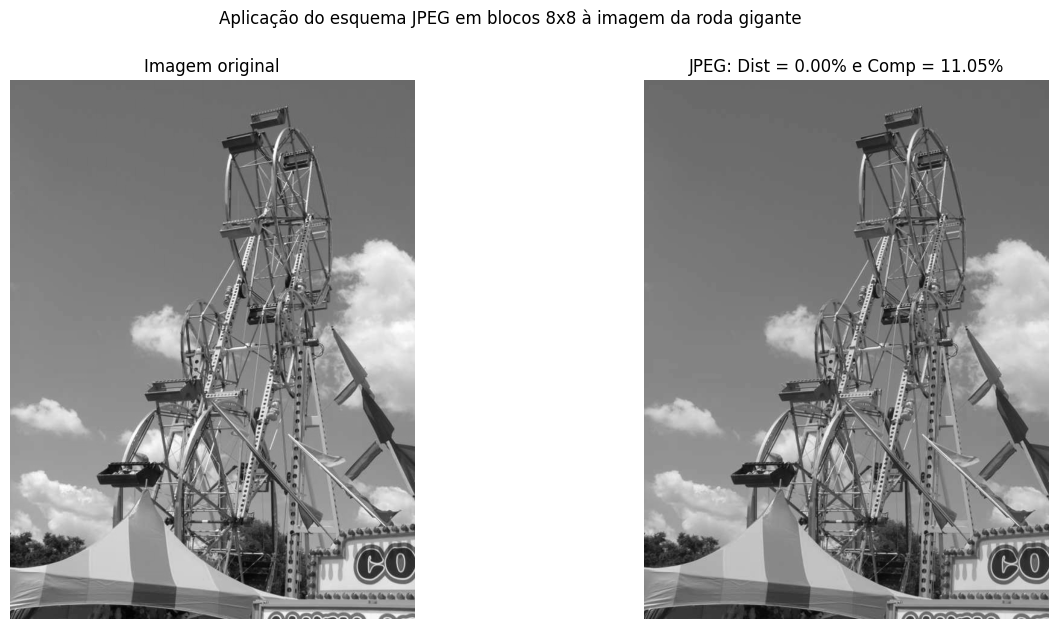

In [16]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].imshow(M, cmap='gray');ax[0].axis('off');ax[0].set_title("Imagem original")
ax[1].imshow(Mn, cmap='gray');ax[1].axis('off');
ax[1].set_title("JPEG: Dist = {0:.2f}% e Comp = {1:.2f}%".format(100*np.linalg.norm(M-Mn)**2/np.linalg.norm(M)**2,100*np.sum(Nquant!=0)/(My*Mx)));
fig.suptitle("Aplicação do esquema JPEG em blocos 8x8 à imagem da roda gigante");plt.show()

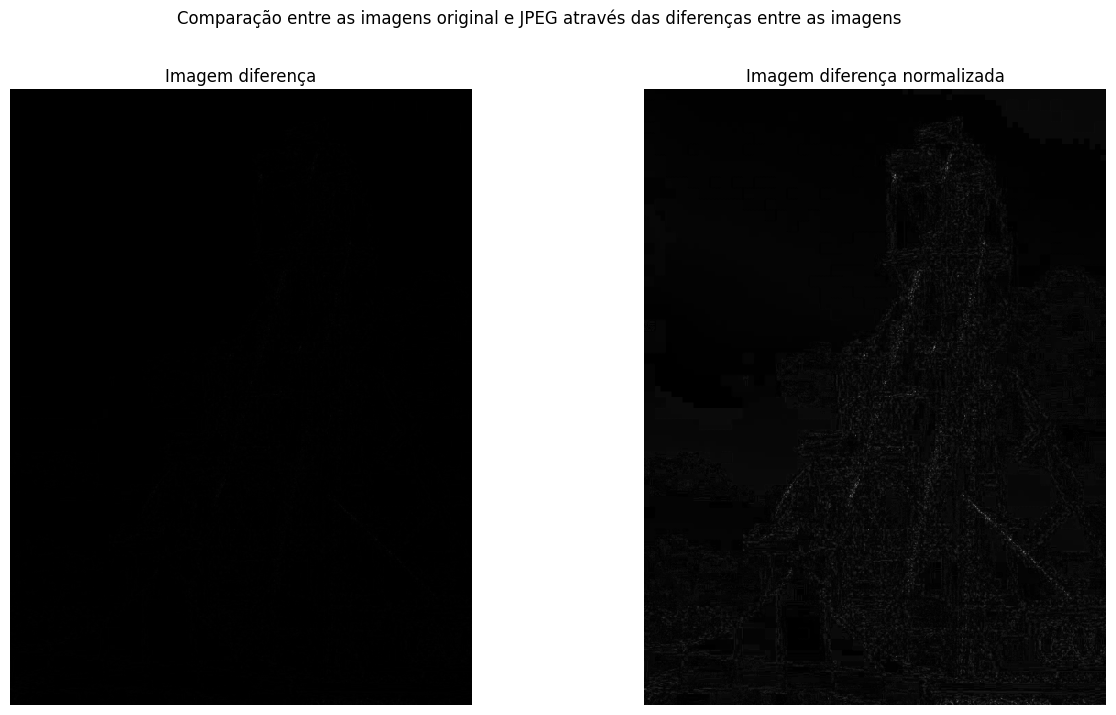

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,8))
ax[0].imshow(abs(M-Mn), cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Imagem diferença");ax[0].axis('off')
ax[1].imshow((abs(M-Mn)/np.amax(M-Mn)), cmap='gray')
ax[1].set_title("Imagem diferença normalizada");ax[1].axis('off');
fig.suptitle("Comparação entre as imagens original e JPEG através das diferenças entre as imagens");plt.show()

### Codificação sequencial $\times$ progressiva

- **Sequencial:** varredura tradicional (por linhas, por exemplo) da matriz $\hat{B}$ com blocos $\hat{B}_{ij}\in M_{8\times 8}(\mathbb{R})$. Pode-se reconstruir a imagem a partir dos blocos $8\times 8$ do canto superior esquerdo, na varredura por linhas, sendo que a qualidade da imagem parcial reconstruída é a melhor possível.

- **Progressiva:** baseada no agrupamento das DCT's dos blocos por pares de frequência ($k,l$) iguais. Transmite-se inicialmente os coeficientes D.C. ($\hat{C}_{0,0}$) e progressivamente adicionam-se frequências mais altas. A informação chega na forma de uma imagem inteira e grosseira, e progressivamente aumenta-se a definição.

### Reconstrução progressiva usando coeficientes DCT

Considere uma imagem $A$ de tamanho $m\times n$, e seja $\hat{A}$ sua DCT em blocos agrupados por frequência, onde $\tilde{A}^{(k,l)}$, é um bloco de tamanho $\frac{m}{8}\times\frac{n}{8}$, para $k,l=0,1,\ldots,7$.

Seja agora a matriz $\widehat{A^{(k,l)}}$ a matriz $m\times n$ obtida por manter apenas o bloco $\tilde{A}^{(k,l)}$ e zerar o resto da matriz.

Definiremos a reconstrução de nível $s=0,1,\ldots,14$ como a matriz $A_s$ que é a transformada inversa da matriz

$$\widehat{A_s} = \sum_{k+l=s} \widehat{A^{(k,l)}} = \sum_{k=0}^s\sum_{l=0}^{s-k}\widehat{A^{(k,l)}}.$$

Assim,

$$\begin{array}{l}
A_0 = \mbox{IDCT_BLK}(\widehat{A_0}) = \mbox{IDCT_BLK}(\widehat{A^{(0,0)}})\\
A_1 = \mbox{IDCT_BLK}(\widehat{A_1}) = \mbox{IDCT_BLK}(\widehat{A^{(0,1)}}+\widehat{A^{(1,0)}})\\
A_2 = \mbox{IDCT_BLK}(\widehat{A_2}) = \mbox{IDCT_BLK}(\widehat{A^{(0,2)}}+\widehat{A^{(1,1)}}+\widehat{A^{(2,0)}})\\
\vdots
\end{array}$$

correspondem a níveis de detalhes associados a combinações de frequências $k+l=s$ progressivamente mais altas.

Note que
$$\hat{A} = \sum_{s=0}^{14}\widehat{A_s},$$

assim, pela linearidade da DCT,

$$A = \sum_{s=0}^{14} A_s.$$

A *reconstrução até ordem* $l=0,1,\ldots,14$ é a imagem

$$\sum_{s=0}^{l} A_s.$$

In [18]:
%%capture

plt.ion()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.gray()
plt.axis("off")
ims = []
Nl=0*Ntil
for l in range(15):
    for j in range(l+1):
        k = l-j
        Nl[j:My:divsize,k:Mx:divsize] = Ntil[j:My:divsize,k:Mx:divsize]
    Ml = np.round(blkidct2(Nl,divsize,divsize))
    im = plt.imshow(Ml, cmap='gray')
    title = f"Reconstrução progressiva até j+k={l}, distorção introduzida={100*np.linalg.norm(Mn-Ml)**2/np.linalg.norm(M)**2:.2f}%"
    ttl = plt.text(0.5, -0.1, title, horizontalalignment='center', verticalalignment='bottom', fontsize='large', transform=ax.transAxes)
    ims.append([im, ttl])
    
imf = anim.ArtistAnimation(fig, ims, interval=1000, blit=True, repeat=False)

## Exemplo 3.2 e figura 3.17

In [19]:
HTML(imf.to_jshtml())